In [1]:
import quizlib
quiz = quizlib.McStasScriptQuiz()

# McStasScript e-learning quiz
This notebook contains quiz questions meant to be completed after a lecture on the McStasScript package, but can be used without. Feel free to use the McStasScript documentation as an aid, it can be found at [https://mads-bertelsen.github.io](https://mads-bertelsen.github.io)

The learning goals
- Read McStasScript code
    - Understand instrument object
    - Understand component object
- Use McStasScript help features
    - Python help feature
    - Help methods on instrument object    
    - Help methods on component object
- Write McStasScript code
    - Create an instrument object
    - Add components to own instrument object
    - Modify component properties
    - Perform simulation
    - Plot data

## Read McStasScript code
The first step is to just be able to read McStasScript code and understand what it describes. The cell below contains some code, read it and answer the questions about it below.

In [2]:
import mcstasscript as ms
instrument = ms.McStas_instr("demo_instrument")

source = instrument.add_component("Source", "Source_simple")
source.E0 = instrument.add_parameter("energy", value=5, comment="Energy of source")
source.set_parameters(xwidth=0.1, yheight=0.1, dE="0.1*energy",
                      dist=2, focus_xw=0.03, focus_yh=0.03)

guide = instrument.add_component("Guide", "Guide_gravity")
guide.set_AT([0, 0, source.dist], RELATIVE=source)
guide.set_parameters(w1=source.focus_xw, h1=source.focus_yh, l=5, m=3)

monitor = instrument.add_component("PSD", "PSD_monitor")
monitor.set_AT(guide.l + 0.5, RELATIVE=guide)
monitor.set_parameters(xwidth=0.05, yheight=0.05, filename='"psd.dat"')

### Question 1
How many components are inserted in the above instrument?

In [3]:
quiz.question_1(3)

Correct!


### Question 2
What is the distance between the source and monitor?

In [4]:
quiz.question_2(7.5)

Correct!


### Question 3
Select the one true statement among these:
- A: The component objects know about the instrument
- B: The instrument object contains component objects
- C: The component objects need to be included in the instrument before simulation

In [5]:
quiz.question_3("B")

Correct!
Yes, the instrument contains all the defined components.


## Use McStasScript help features

McStasScript has a number of help features:
- Through python features
    - Help
    - Print
- Through instrument object
    - available_components
    - component_help (input name of component to get help on)
    - show_parameters
    - show_variables
    - show_components
    - show_diagram
    - show_instrument
    - show_instrument_file
    - show_settings
- Through component object
    - show_parameters
    
Below are demonstrations of how to use a few of these on the instrument object made in the previous exercise. Play around with the help features to answer the questions below.

In [6]:
help(instrument.add_parameter) # Built in Python help on the add_parameter method

Help on method add_parameter in module mcstasscript.interface.instr:

add_parameter(*args, **kwargs) method of mcstasscript.interface.instr.McStas_instr instance
    Method for adding input parameter to instrument
    
    Type does not need to be specified, McStas considers that a floating
    point value with the type 'double'. Uses libpyvinyl Parameter object.
    
    Examples
    --------
    Creates a parameter with name wavelength and associated comment
    add_parameter("wavelength", comment="wavelength in [AA]")
    
    Creates a parameter with name A3 and default value
    add_parameter("A3", value=30, comment="A3 angle in [deg]")
    
    Creates a parameter with type string and name sample_name
    add_parameter("string", "sample_name")
    
    Parameters
    ----------
    
    (optional) parameter type : str
        type of input parameter, double, int, string
    
    parameter name : str
        name of parameter
    
    keyword arguments
        value : float, int o

In [7]:
instrument.show_components() # instrument help method to show the components in the instrument

Source Source_simple AT (0, 0, 0)   ABSOLUTE       
Guide  Guide_gravity AT (0, 0, 2)   RELATIVE Source
PSD    PSD_monitor   AT (0, 0, 5.5) RELATIVE Guide 


In [8]:
print(source) # Python print on a component object, here the source

COMPONENT Source = Source_simple
  yheight = 0.1 [m]
  xwidth = 0.1 [m]
  dist = 2 [m]
  focus_xw = 0.03 [m]
  focus_yh = 0.03 [m]
  E0 = energy [meV]
  dE = 0.1*energy [meV]
AT [0, 0, 0] ABSOLUTE


In [9]:
source.show_parameters() # show_parameters method on component object

 ___ Help Source_simple _____________________________________________________________
|optional parameter|required parameter|default value|user specified value|
radius = 0.1 [m] // Radius of circle in (x,y,0) plane where neutrons are 
                    generated. 
yheight = 0.1 [m] // Height of rectangle in (x,y,0) plane where neutrons are 
                     generated. 
xwidth = 0.1 [m] // Width of rectangle in (x,y,0) plane where neutrons are 
                    generated. 
dist = 2 [m] // Distance to target along z axis.
focus_xw = 0.03 [m] // Width of target
focus_yh = 0.03 [m] // Height of target
E0 = energy [meV] // Mean energy of neutrons.
dE = 0.1*energy [meV] // Energy half spread of neutrons (flat or gaussian 
                         sigma). 
lambda0 = 0.0 [AA] // Mean wavelength of neutrons.
dlambda = 0.0 [AA] // Wavelength half spread of neutrons.
flux = 1.0 [1/(s*cm**2*st*energy unit)] // flux per energy unit, Angs or meV if 
                                         

In [10]:
# Try more help calls

### Question 4
What information does the *show_parameters* method on the instrument object produce?
- A: Show how to add parameters to the instrument
- B: Show the component parameters with their current and default values
- C: Show available McStas parameter types
- D: Show the current instrument input parameters along with value and comment

In [11]:
# Use the show_parameters method on the instrument object

In [12]:
quiz.question_4("D")

Correct!


### Question 5
How could you check the unit of a component parameter?
- A: Print the component
- B: Use *show_parameters* on a component object 
- C: Use the get_component() method on the instrument
- D: Use component_help on the instrument with the component type name

In [13]:
quiz.question_5(["A", "B", "D"])

Correct!
That would work if the parameter of interest has been specified.
Correct!
This is the best option, it shows all available parameters and their units.
Correct!
This would work and be the preferred option if you don't have a component object
of that type.


## Write McStasScript code
Now that you have familiarized yourself a bit with McStasScript, it is time to try use it. The questions will guide you through building and running your first McStasScript instrument.

In [14]:
del instrument, source, guide, monitor

### Question 6
Provide a McStas instrument object, name it "my_instrument".

In [15]:
# your code
instrument = ms.McStas_instr("my_instrument")

quiz.question_6(instrument)

Correct!
The object is of the right type and its properties are as expected.


### Question 7
Add a 'Source_div' component to your instrument. Set the parameters as follows:
- focus_aw and focus_ah to 1.0 deg
- lambda0 to 1.2 Å
- dlambdA to 0.1 Å
- xwidth and yheight to 3.5 cm

Provide the updated instrument object as the answer.

In [16]:
# your code
source = instrument.add_component("source", "Source_div")
source.set_parameters(focus_aw=1.0, focus_ah=1.0,
                      lambda0=1.2, dlambda=0.1,
                      xwidth=0.035, yheight=0.035)

In [17]:
quiz.question_7(instrument)

Correct!
The Source_div source was found with the right parameters.


### Question 8
Update your instrument to include a PowderN sample 1.0 m after the source. Use the source as the relative. The sample should have the following properties:
- radius of 0.75 cm
- yheight of 3.00 cm
- reflections datafile Y2O3.laz

In [18]:
# your code
sample = instrument.add_component("sample", "PowderN")
sample.set_parameters(radius=7.5E-3, yheight=3.0E-2, reflections='"Y2O3.laz"')
sample.set_AT([0, 0, 1], RELATIVE=source)

In [19]:
quiz.question_8(instrument)

Correct!
The powderN component was found with the right parameters and position.


### Question 9
Place a PSD monitor relative to the sample, 40 cm in the beam direction. It should have the following properties:
- width and height of 50 cm
- the filename psd.dat
- set restore_neutron to 1

In [20]:
# your code
monitor = instrument.add_component("PSD", "PSD_monitor")
monitor.set_AT(0.4, RELATIVE=sample)
monitor.set_parameters(xwidth=0.5, yheight=0.5, filename='"psd.dat"', restore_neutron=1)

In [21]:
quiz.question_9(instrument)

Correct!
The PSD_monitor component was found with the right parameters and position.


### Running the simulation
The instrument you have built is now ready to produce some data. The below code runs the instrument, assuming you have called your instrument object *instrument*, otherwise uncomment the first line and provide your own instrument object.

The *settings* method is used to set settings such as ncount, mpi, foldername and similar.

The *backengine* method performs the simulation and returns a list of McStasData objects corresponding the the McStas output.

In [22]:
#instrument = my_instrument_object

instrument.settings(ncount=3E6)
data = instrument.backengine()

INFO: Using directory: "/Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript-notebooks/my_instrument_data_3"
INFO: Regenerating c-file: my_instrument.c
CFLAGS=
INFO: Recompiling: ./my_instrument.out
mccode-r.c:2837:3: warning: expression result unused [-Wunused-value]
  *t0;
  ^~~
1 warning generated.
INFO: ===
         (negative time, miss next components, rounding errors, Nan, Inf).
INFO: Placing instr file copy my_instrument.instr in dataset /Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript-notebooks/my_instrument_data_3

Instrument parameters for my_instrument (my_instrument.instr)
Opening input file '/Applications/McStas-2.7.1.app/Contents/Resources/mcstas/2.7.1//data/Y2O3.laz' (Table_Read_Offset)
Table from file 'Y2O3.laz' (block 1) is 871 x 18 (x=2:21), constant step. interpolation: linear
  '# TITLE *-Y2O3-[IA3-] Baldinozzi, G.;Berar, J.F.;Calvarin, G.[1998];# CELL  ...'
PowderN: sample: Reading 871 rows from Y2O3.laz
PowderN: sample: Read 871 reflections fro

### Plotting the data
The Python print function provides some information on the included data, but it can of course be plotted easily with *make_plot* or *make_sub_plot* as below. We use a log scale to show the powder rings.

In [23]:
print(data)

[
McStasData: PSD type: 2D  I:0.000675889 E:6.68814e-07 N:2.1143e+06]


Plotting data with name PSD


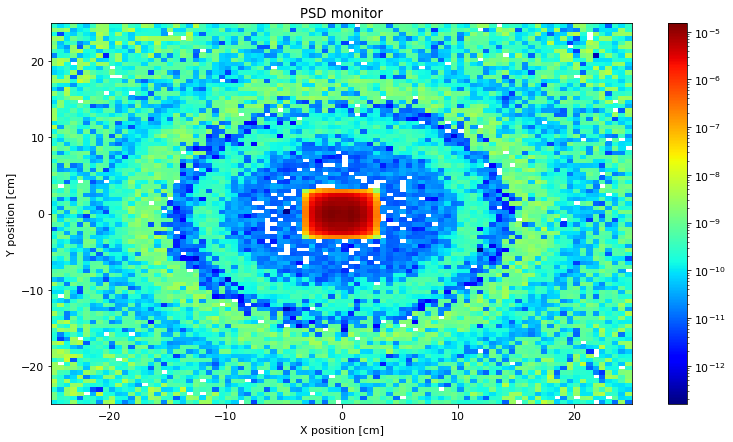

In [24]:
ms.make_plot(data, log=True)

### Question 10
It is time to work with instrument parameters. These may not seem as useful in McStasScript as when working with mcgui or in the commandline, but they still have a number of advantages when used well.

Modify your source object to use a parameter called "wavelength" for the center of the wavelength distribution and "wavelength_half_spread" for the half wavelength spread. These correspond directly to parameters in *Source_div*.

Even though the component object is modified, the instrument file can still be given as the answer as it knows about all its components and their properties.

In [25]:
# your code
source.lambda0 = instrument.add_parameter("wavelength", value=1.2, comment="Wavelength in [Å]")
source.dlambda = instrument.add_parameter("wavelength_half_spread", value=0.1, comment="Half wavelength spread in [Å]")

In [26]:
quiz.question_10(instrument)

Correct!
All parameters were correctly defined and assigned!


### Running an instrument with parameters
The instrument parameters can be displayed with *show_parameters* and set with *set_parameters* on the instrument. Running the instrument with the *backengine* method will use the current parameter values. 

In [27]:
instrument.set_parameters(wavelength_half_spread=0.05)
instrument.show_parameters()

 wavelength              = 1.2   // Wavelength in [Å]
 wavelength_half_spread  = 0.05  // Half wavelength spread in [Å]


McStasScript also contains a helpful widget system for running the simulation, it is shown below for your instrument. A box should appear with the text "No data available yet", if this doesn't happen rerun the cell. You can run the simulation with the run button, and will probably need to use the log option in the sidebar to see the results clearly.

In [28]:
%matplotlib widget
import mcstasscript.jb_interface as ms_widget
ms_widget.show(instrument)

### Visualizing the instrument
It is also possible to see the 3D model of the instrument like in mcdisplay. This will also use the current values of the instrument parameters.

In [29]:
instrument.show_instrument()